Módosított róka-nyúl (Lotka–Volterra-) probléma. 

A nyulak korlátlan szaporodása helyett vegyük figyelembe a terület véges eltartóképességét:helyettesítsük r-et rN(1−(N/K))-val.

Vegyük figyelembe azt is, hogy ha a nyulak sokan vannak, a rókák csak véges számú nyulat tudnak elfogyasztani (az, hogy N-nel arányos a szaporodásuk, csak kis R-re érvényes). Helyettesítsük ezért NR-et NR/s+N-nel.

A módosított róka-nyúl (Lotka-Volterra) probléma egyenletrendszere:
$${\dot{N}}=rN(1−(N/K))−bNR/(s+N)$$ $${\dot{R}}=cNR/(s+N)−hR ,$$

vagyis bőség (N≫1) esetén a rókák száma időegységenként (c−h)R-nyit változik.

Vizsgáljuk a problémát numerikusan az $${\dot{N}}=1.5N(1−(N/45))−5NR/(18+N)$$ $${\dot{R}}=10NR/(18+N)−4R ,$$ dimenziótlan alakban. 

Hogyan függ a róka és a nyúl populáció létszáma az időtől,
R0= 6, N0= 20, 18, ..., 10, 8 kezdeti populáció esetén? 
Mi a lényegi különbség a hagyományos róka-nyúl dinamikához képest?

In [51]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [52]:
N0=14
R0=6
dt=0.01
n=640

In [53]:
t=[]                     # itt megadok egy tetszőleges struktúrát t-nek ami az idő lesz
for i in range (0,n):    # for-ciklus azt csinálja, hogy 0-tól n-ig a t-be beírja azt, hogy dt*i. Így elég a dt-t változtatni ahhoz, hogy más időket adjunk meg
    t.append(dt*i)       # dt=0.1 esetén most ez így néz ki: t=˙[0,0.1,0.2,0.3........n*0.1]


In [54]:
a=zeros((4,n))       # az a egy 4xn-es mátrix lesz, ahol a 4 oszlopban lesznek az N0-N'-R0-R' adatok.
a[0,0]=N0            # a 0. (az első) oszlopba beírja az N0 eddigi elemeit
a[1,0]=0             
a[2,0]=R0
a[3,0]=0
a

array([[ 14.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [55]:
def sor (q):  # definiálom a sor függvényt. Ez azt fogja csinálni, hogy végigmegy a mátrix sorain majd, és elvégzi soronként az adott műveleteket.
    s=[(0),(0),(0),(0)]  # az s az maga az adott sor lesz éppen, amire végrehajtja a műveletet, ez ugye 4 oszlopból áll.
    s[0]=a[(0),(q-1)]+a[(1),(q-1)]*dt   # az adott sor (s) első eleme helyére beírjuk az Euler képletből mi jött ki N0-ra.
    s[1]=a[(1),(q-1)]+(1.5*a[(0),(q-1)]*(1-(a[(0),(q-1)]/45))-(5*(a[(0),(q-1)]*a[(2),(q-1)]))/(18+a[(0),(q-1)]))*dt
    s[2]=a[(2),(q-1)]+a[(3),(q-1)]*dt
    s[3]=a[(3),(q-1)]+((10*(a[(0),(q-1)]*a[(2),(q-1)]))/(18+a[(0),(q-1)])-4*a[(2),(q-1)])*dt
    return s   #és a függvény a legvégén visszaadja nekünk a kiszámolt értékeket.

sor (2)  # ez egy példa, hogy a 2. sor a kezdeti paraméterek után hogy fog kinézni, ellenőrízhetjük, hogy működik-e.

[0.0, 0.0, 0.0, 0.0]

In [56]:
for i in range (1,n):  # egy újabb for-ciklus, ami most az a sorain megy végig, és hajtja végre a sor műveleteket. Itt fontos, hogy a 2. sor (1)-től menjen végig, mert a 1. sort már megadtuk, azt ne változtassa meg.
    a[:,i]=[(sor(i)[0]),(sor(i)[1]),sor(i)[2],sor(i)[3]]

In [57]:
a

array([[  1.40000000e+01,   1.40000000e+01,   1.40001342e+01, ...,
          5.78118640e+02,   5.99545660e+02,   6.20797305e+02],
       [  0.00000000e+00,   1.34166667e-02,   2.68333333e-02, ...,
          2.14270200e+03,   2.12516447e+03,   2.10200446e+03],
       [  6.00000000e+00,   6.00000000e+00,   6.00022500e+00, ...,
         -1.75700838e+03,  -1.80594171e+03,  -1.85587618e+03],
       [  0.00000000e+00,   2.25000000e-02,   4.50000000e-02, ...,
         -4.89333215e+03,  -4.99344731e+03,  -5.09653992e+03]])

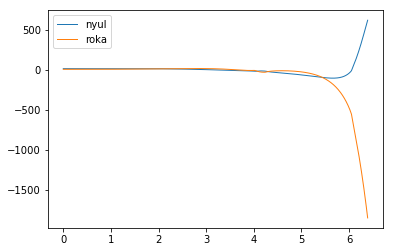

In [58]:
plot(t,a[0,:], label='nyul', linewidth=1) 
plot(t,a[2,:], label='roka', linewidth=1)
legend()

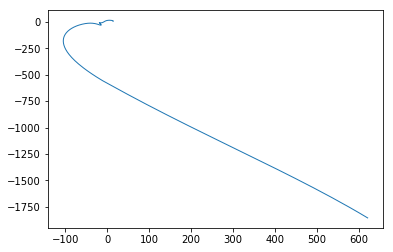

In [59]:
plot(a[0,:],a[2,:], linewidth=1) 

In [61]:
a[(0),(600)]

-42.635531365782803